In [45]:
# Import libraries
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# increase the size and quality of any plots we produce
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 150

In [4]:
# load file
county_sum = pd.read_csv("https://raw.githubusercontent.com/mellanyquiroz/DS4A-TeamProject/master/data/Merged_deaths_hospital_poverty_by_county.csv", index_col="County")
county_sum.head()

,Unnamed: 0,COUNT_FAC,TOTAL_NUMBER_BEDS,FAC_DENSITY,BEDS_DENSITY,RATES19,COUNTS19,RATES20,COUNTS20,COUNTS_GR19,COUNTS_GR20,RATES_GR19,RATES_GR20,CPM_rate,CPM_number
County,,,,,,,,,,,,,,,
Los Angeles,0,72,20947,0.722202,210.110627,6.70,707.0,12.40,1300.0,42.253521,83.875530,46.608315,85.074627,20.8,2061100.0
Orange,1,26,5968,0.818864,187.960808,8.13,272.0,15.45,503.0,7.936508,84.926471,8.981233,90.036900,19.1,595800.0
San Bernardino,2,19,4079,0.860995,184.841962,6.10,133.0,12.95,288.0,25.471698,116.541353,27.882600,112.295082,15.3,323700.0
San Diego,3,18,6260,0.537752,187.018077,8.92,314.0,15.14,528.0,17.164179,68.152866,20.703654,69.730942,17.8,576600.0
Riverside,4,17,3512,0.674587,139.361761,9.77,245.0,16.05,400.0,70.138889,63.265306,70.209059,64.278403,16.1,388300.0


In [6]:
# remove "Unnamed: 0"
county_sum = county_sum.drop(columns="Unnamed: 0")

In [20]:
# rename columns
to_rename = {"County":"COUNTY","CPM_rate":"CPM_RATE","CPM_number":"CPM_NUMBER"}
county_sum = county_sum.reset_index().rename(columns=to_rename)
county_sum.head()

,COUNTY,COUNT_FAC,TOTAL_NUMBER_BEDS,FAC_DENSITY,BEDS_DENSITY,RATES19,COUNTS19,RATES20,COUNTS20,COUNTS_GR19,COUNTS_GR20,RATES_GR19,RATES_GR20,CPM_RATE,CPM_NUMBER
0,Los Angeles,72,20947,0.722202,210.110627,6.70,707.0,12.40,1300.0,42.253521,83.875530,46.608315,85.074627,20.8,2061100.0
1,Orange,26,5968,0.818864,187.960808,8.13,272.0,15.45,503.0,7.936508,84.926471,8.981233,90.036900,19.1,595800.0
2,San Bernardino,19,4079,0.860995,184.841962,6.10,133.0,12.95,288.0,25.471698,116.541353,27.882600,112.295082,15.3,323700.0
3,San Diego,18,6260,0.537752,187.018077,8.92,314.0,15.14,528.0,17.164179,68.152866,20.703654,69.730942,17.8,576600.0
4,Riverside,17,3512,0.674587,139.361761,9.77,245.0,16.05,400.0,70.138889,63.265306,70.209059,64.278403,16.1,388300.0


In [21]:
# Check data types
county_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   COUNTY             55 non-null     object 
 1   COUNT_FAC          55 non-null     int64  
 2   TOTAL_NUMBER_BEDS  55 non-null     int64  
 3   FAC_DENSITY        55 non-null     float64
 4   BEDS_DENSITY       55 non-null     float64
 5   RATES19            55 non-null     float64
 6   COUNTS19           55 non-null     float64
 7   RATES20            55 non-null     float64
 8   COUNTS20           55 non-null     float64
 9   COUNTS_GR19        52 non-null     float64
 10  COUNTS_GR20        55 non-null     float64
 11  RATES_GR19         52 non-null     float64
 12  RATES_GR20         55 non-null     float64
 13  CPM_RATE           55 non-null     float64
 14  CPM_NUMBER         55 non-null     float64
dtypes: float64(12), int64(2), object(1)
memory usage: 6.6+ KB


## Statistical Analysis

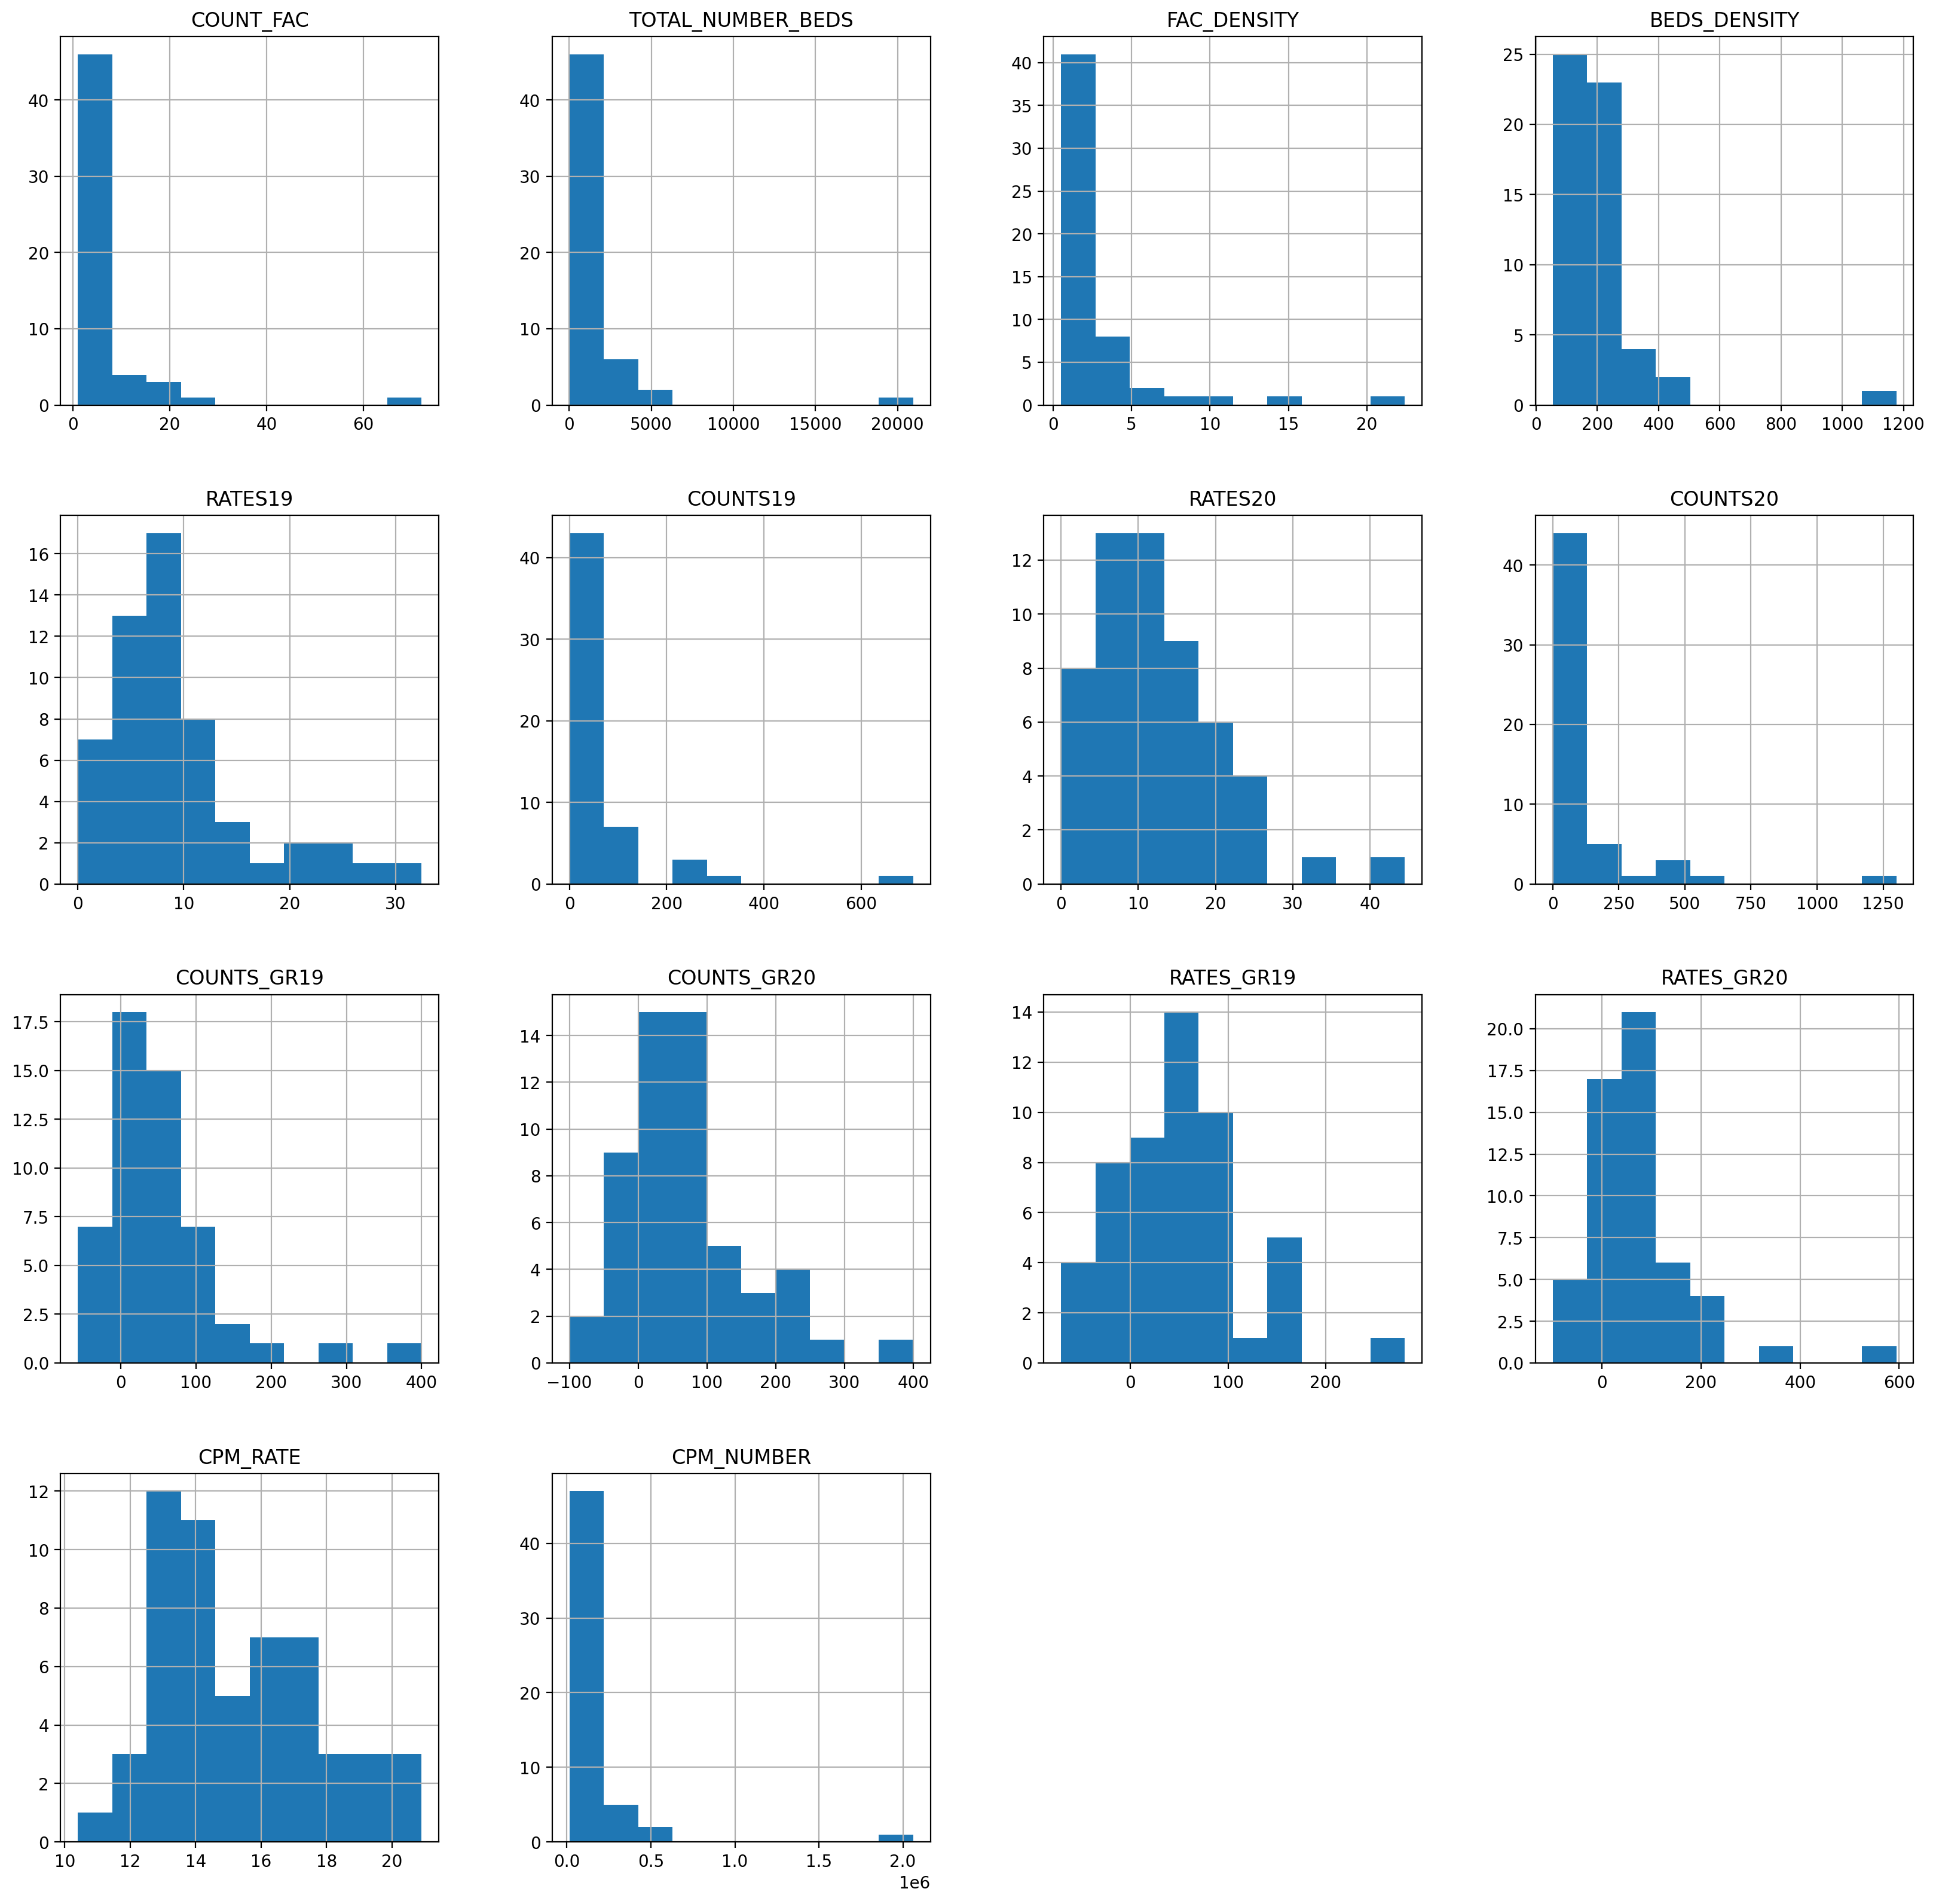

In [22]:
# Check statistical distributions of variables
hist = county_sum.hist(bins=10, figsize=(20,20))

In [23]:
# Check outliers for facility density
county_sum[county_sum["FAC_DENSITY"]>20]

,COUNTY,COUNT_FAC,TOTAL_NUMBER_BEDS,FAC_DENSITY,BEDS_DENSITY,RATES19,COUNTS19,RATES20,COUNTS20,COUNTS_GR19,COUNTS_GR20,RATES_GR19,RATES_GR20,CPM_RATE,CPM_NUMBER
36,Modoc,2,105,22.413986,1176.734282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.8,14900.0


In [24]:
# Check outliers for Beds density
county_sum[county_sum["BEDS_DENSITY"]>1000]

,COUNTY,COUNT_FAC,TOTAL_NUMBER_BEDS,FAC_DENSITY,BEDS_DENSITY,RATES19,COUNTS19,RATES20,COUNTS20,COUNTS_GR19,COUNTS_GR20,RATES_GR19,RATES_GR20,CPM_RATE,CPM_NUMBER
36,Modoc,2,105,22.413986,1176.734282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.8,14900.0


It seems like Modoc County has very high facility density and beds density. When searching about Modoc County, it is California's third-least populous county. Much of it is federal land (national forest, BLM, national park) [(Wiki)](https://en.wikipedia.org/wiki/Modoc_County,_California). For visualization purpose, we'd take it out when visualizing numbers on the map.

In [26]:
# Check outliers for CPM number
county_sum[county_sum["CPM_NUMBER"] > 1500000]

,COUNTY,COUNT_FAC,TOTAL_NUMBER_BEDS,FAC_DENSITY,BEDS_DENSITY,RATES19,COUNTS19,RATES20,COUNTS20,COUNTS_GR19,COUNTS_GR20,RATES_GR19,RATES_GR20,CPM_RATE,CPM_NUMBER
0,Los Angeles,72,20947,0.722202,210.110627,6.7,707.0,12.4,1300.0,42.253521,83.87553,46.608315,85.074627,20.8,2061100.0


Los Angeles is a big county, so it's normal that it has a high number.

## Correlations between variables

In [40]:
corr = county_sum.corr()
corr.style.background_gradient(cmap='coolwarm')

,COUNT_FAC,TOTAL_NUMBER_BEDS,FAC_DENSITY,BEDS_DENSITY,RATES19,COUNTS19,RATES20,COUNTS20,COUNTS_GR19,COUNTS_GR20,RATES_GR19,RATES_GR20,CPM_RATE,CPM_NUMBER
COUNT_FAC,1.000000,0.988807,-0.192245,-0.016960,-0.054879,0.951419,0.096978,0.965352,-0.048491,0.057301,-0.025229,0.009719,0.404090,0.985975
TOTAL_NUMBER_BEDS,0.988807,1.000000,-0.200027,-0.014553,-0.070256,0.953675,0.063602,0.962572,-0.030543,0.052253,-0.012439,0.012755,0.391849,0.994664
FAC_DENSITY,-0.192245,-0.200027,1.000000,0.791654,0.075280,-0.229231,-0.192274,-0.216195,-0.202389,-0.255546,-0.164650,-0.237556,-0.323826,-0.180542
BEDS_DENSITY,-0.016960,-0.014553,0.791654,1.000000,-0.050513,-0.022164,-0.158513,-0.020252,-0.115390,-0.181401,-0.026292,-0.202187,-0.131910,-0.027774
RATES19,-0.054879,-0.070256,0.075280,-0.050513,1.000000,0.055547,0.578869,0.029901,0.044035,-0.402486,0.260249,-0.422613,0.018460,-0.078021
COUNTS19,0.951419,0.953675,-0.229231,-0.022164,0.055547,1.000000,0.231303,0.994115,-0.023448,0.035524,-0.006007,-0.004950,0.413572,0.940744
RATES20,0.096978,0.063602,-0.192274,-0.158513,0.578869,0.231303,1.000000,0.226480,0.026914,0.246251,0.091436,0.170135,0.158787,0.035523
COUNTS20,0.965352,0.962572,-0.216195,-0.020252,0.029901,0.994115,0.226480,1.000000,-0.037393,0.077309,-0.020895,0.031538,0.410922,0.953552
COUNTS_GR19,-0.048491,-0.030543,-0.202389,-0.115390,0.044035,-0.023448,0.026914,-0.037393,1.000000,-0.296466,0.796864,-0.227300,-0.096904,-0.034606
COUNTS_GR20,0.057301,0.052253,-0.255546,-0.181401,-0.402486,0.035524,0.246251,0.077309,-0.296466,1.000000,-0.302050,0.915100,-0.037708,0.043953


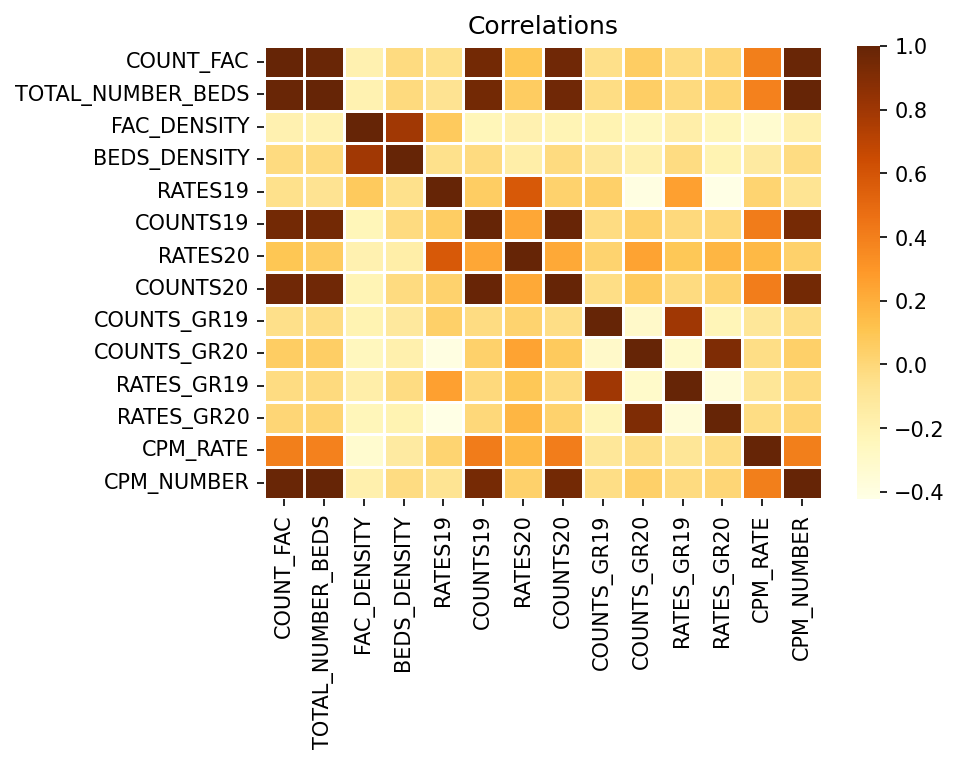

In [46]:
# create correlation heatmap
hm = sns.heatmap(county_sum.corr(), annot = False, linewidths=.5, cmap="YlOrBr")
hm.set(title="Correlations")
plt.show()

Correlations with Deaths Counts in 2019 and 2020:
- Number of facility and total number of beds have strong positive correlations with death counts in both 2019 and 2020. It just means that the bigger counties have more deaths.
- Poverty rate also have slight positive correlation with death counts

Correlations with Death Rates in 2019 and 2020:
- Death rates in 2019 and 2020 actually have relatively strong correlation with each other (>0.5). It means that similar death rate trends will happen within a county.
- We don't see a clear correlation between death rates and facility, hospital beds, or poverty rate/number.

## Geomapping variables on a map

For this, we need shapefile of California County, which is acquired from [opendatasoft](https://public.opendatasoft.com/explore/dataset/us-county-boundaries/export/?disjunctive.statefp&disjunctive.countyfp&disjunctive.name&disjunctive.namelsad&disjunctive.stusab&disjunctive.state_name&refine.stusab=CA).

In [17]:
# Import library and load shapefile
import geopandas as gpd
map_df = gpd.read_file("/home/thuy/Documents/Data Science/02. DS4A/Capstone_teamrepo/DS4A-TeamProject/data/US County Data/us-county-boundaries.shp")

map_df.head()

,statefp,countyfp,countyns,geoid,name,namelsad,stusab,lsad,classfp,mtfcc,...,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,state_name,countyfp_no,geometry
0,06,031,00277280,06031,Kings,Kings County,CA,06,H1,G4020,...,25260,None,A,3.600884e+09,3162664.0,+36.0724780,-119.8155301,California,31,"POLYGON ((-119.95892 36.25547, -119.95893 36.2..."
1,06,069,00277299,06069,San Benito,San Benito County,CA,06,H1,G4020,...,41940,None,A,3.596591e+09,4719300.0,+36.6116507,-121.0858108,California,69,"POLYGON ((-121.48300 36.76505, -121.48351 36.7..."
2,06,019,00277274,06019,Fresno,Fresno County,CA,06,H1,G4020,...,23420,None,A,1.543214e+10,136609898.0,+36.7610058,-119.6550193,California,19,"POLYGON ((-120.42219 36.84014, -120.42172 36.8..."
3,06,063,00277296,06063,Plumas,Plumas County,CA,06,H1,G4020,...,None,None,A,6.612401e+09,156387636.0,+39.9922953,-120.8243709,California,63,"POLYGON ((-121.36701 40.07767, -121.36688 40.0..."
4,06,027,01804637,06027,Inyo,Inyo County,CA,06,H1,G4020,...,None,None,A,2.641068e+10,76915743.0,+36.5619770,-117.4039269,California,27,"POLYGON ((-118.33758 36.65480, -118.33773 36.6..."


<AxesSubplot:>

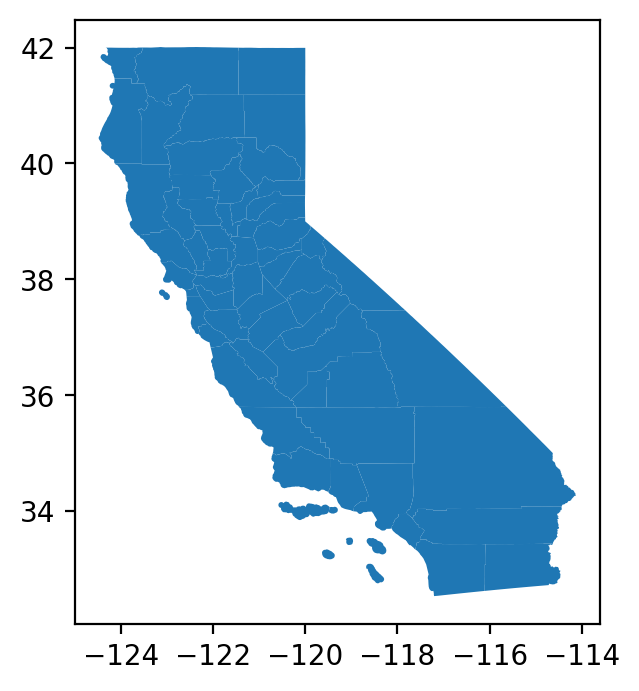

In [18]:
# Check if map works fine
map_df.plot()

In [41]:
# Merge geodata with county data
merged_map = map_df.set_index('name').join(county_sum.set_index("COUNTY"))
merged_map.head()

,statefp,countyfp,countyns,geoid,namelsad,stusab,lsad,classfp,mtfcc,csafp,...,RATES19,COUNTS19,RATES20,COUNTS20,COUNTS_GR19,COUNTS_GR20,RATES_GR19,RATES_GR20,CPM_RATE,CPM_NUMBER
name,,,,,,,,,,,,,,,,,,,,,
Kings,06,031,00277280,06031,Kings County,CA,06,H1,G4020,260,...,1.06,2.0,7.36,10.0,-50.000000,400.000000,-61.594203,594.339623,14.3,19700.0
San Benito,06,069,00277299,06069,San Benito County,CA,06,H1,G4020,488,...,7.98,5.0,6.33,4.0,150.000000,-20.000000,147.826087,-20.676692,17.3,83000.0
Fresno,06,019,00277274,06019,Fresno County,CA,06,H1,G4020,260,...,4.86,48.0,7.01,71.0,37.142857,47.916667,38.068182,44.238683,17.2,167600.0
Plumas,06,063,00277296,06063,Plumas County,CA,06,H1,G4020,None,...,11.77,2.0,6.28,1.0,0.000000,-50.000000,-35.008283,-46.644010,12.8,14900.0
Inyo,06,027,01804637,06027,Inyo County,CA,06,H1,G4020,None,...,14.47,2.0,22.03,3.0,-33.333333,50.000000,-18.570625,52.246026,13.2,23700.0


In [42]:
# Remove Modoc when visualizing
merged_map = merged_map.reset_index()
merged_map_viz = merged_map[merged_map["name"] != "Modoc"]

In [43]:
# Create a function to map the variable
def california_map(variable,maptitle):
    vmin = merged_map_viz[variable].min()
    vmax = merged_map_viz[variable].max()
    fig, ax = plt.subplots(1, figsize=(10,6))
    merged_map_viz.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    ax.set_title(maptitle)

    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # empty array for the data range
    sm._A = []
    
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)

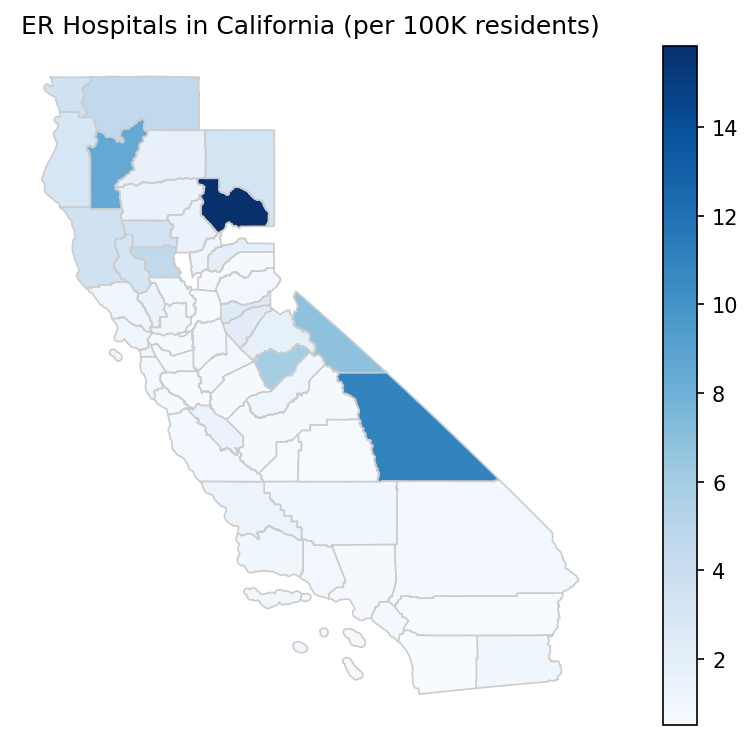

In [47]:
california_map('FAC_DENSITY','ER Hospitals in California (per 100K residents)')

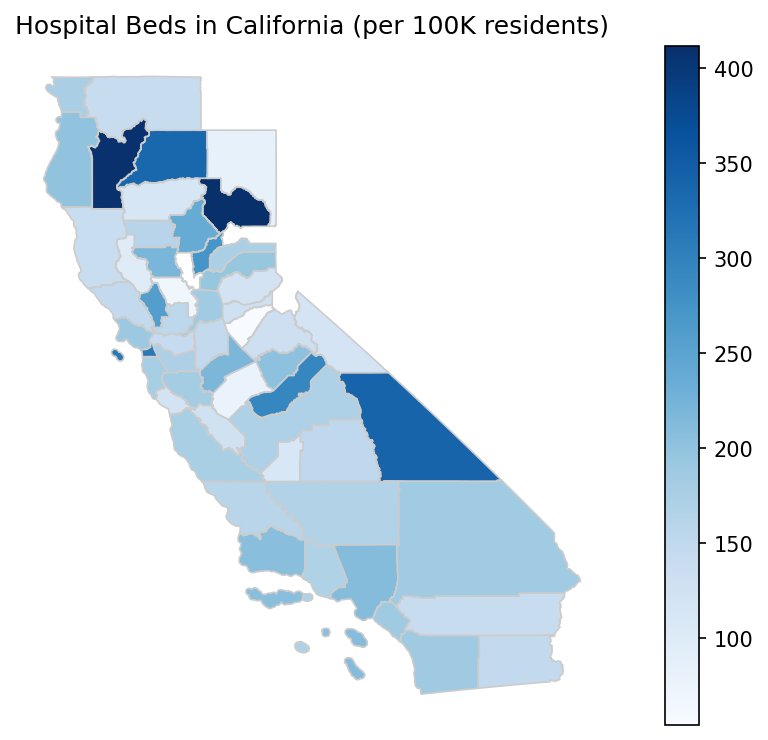

In [52]:
california_map('BEDS_DENSITY','Hospital Beds in California (per 100K residents)')

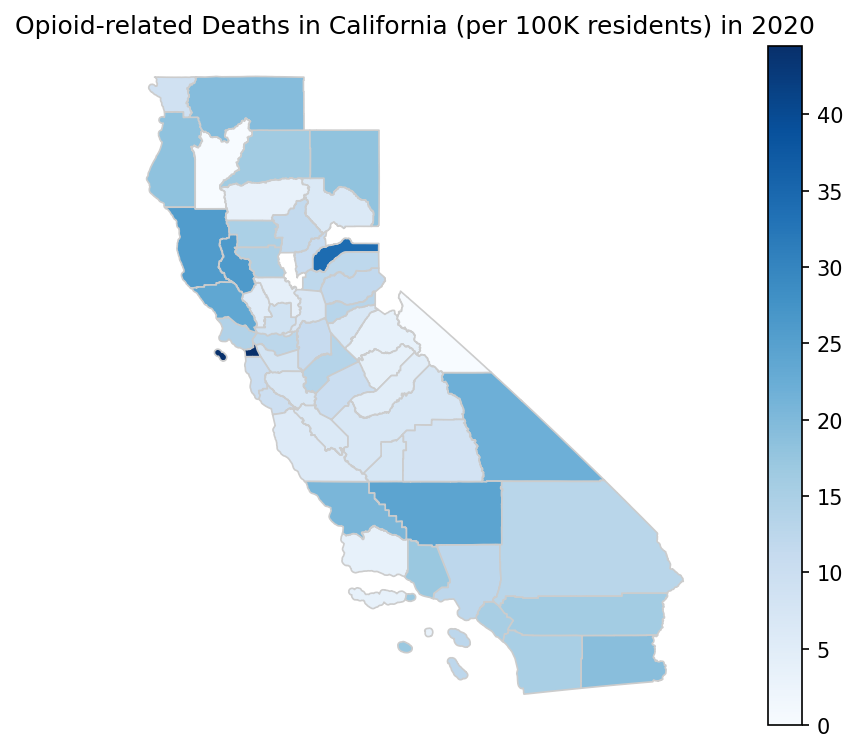

In [48]:
california_map('RATES20','Opioid-related Deaths in California (per 100K residents) in 2020')

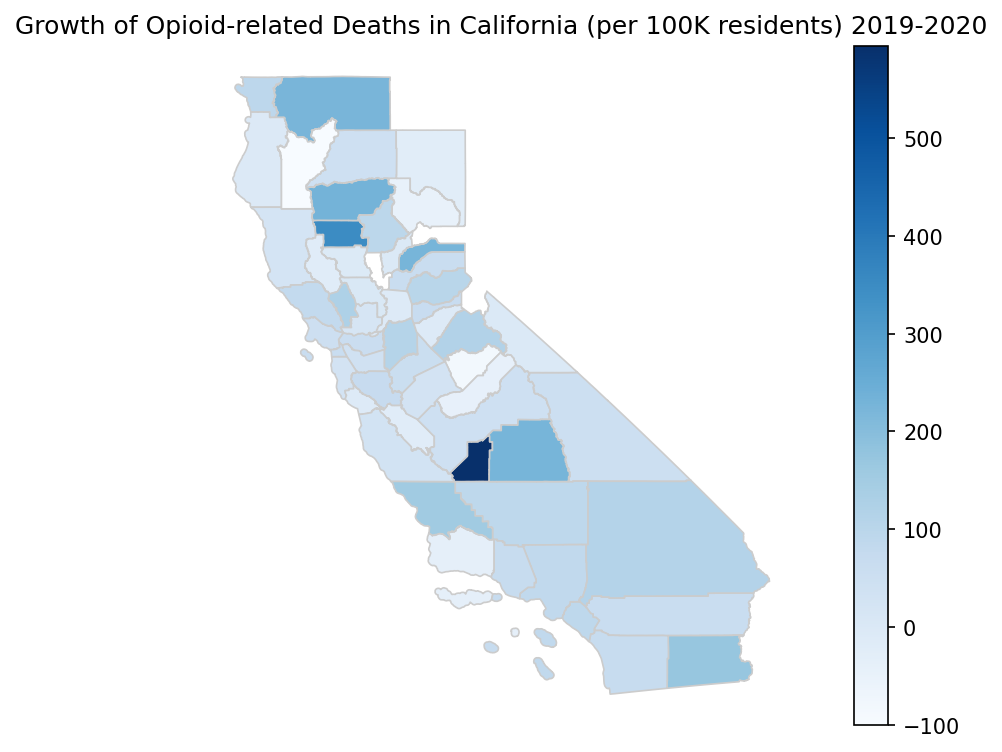

In [49]:
california_map('RATES_GR20','Growth of Opioid-related Deaths in California (per 100K residents) 2019-2020')

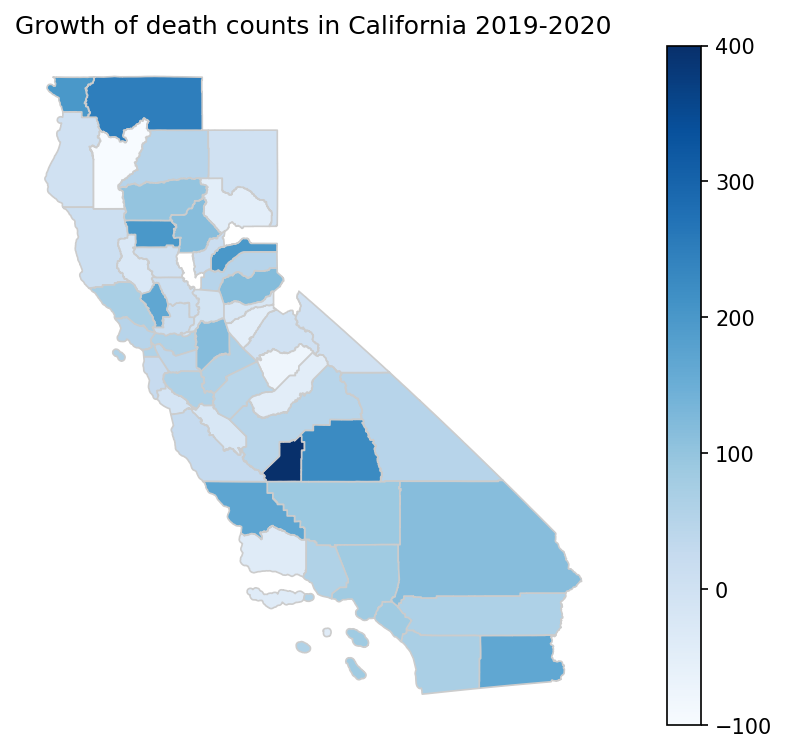

In [53]:
california_map("COUNTS_GR20","Growth of death counts in California 2019-2020")

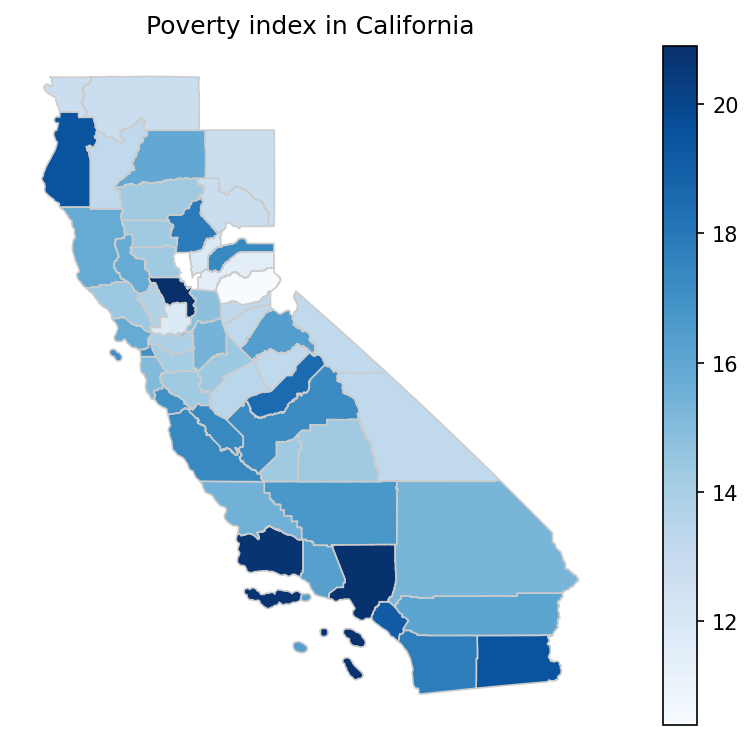

In [50]:
california_map('CPM_RATE','Poverty index in California')